In [1]:
# Importing the required libraries for computation and visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Obtain the data for linear regression

x_train = np.load('data/x_train_simple.npy')
y_train = np.load('data/y_train_simple.npy')

In [3]:
# Create model object and train it with the fit() method

lin_reg = LinearRegression()
p = lin_reg.fit(x_train, y_train)

alpha = p.coef_ # Alpha parameter of the line fitted to the data
beta = p.intercept_ # Beta parameter of the line fitted to the data

print(alpha, beta)

[[0.4903973]] [-0.00724806]


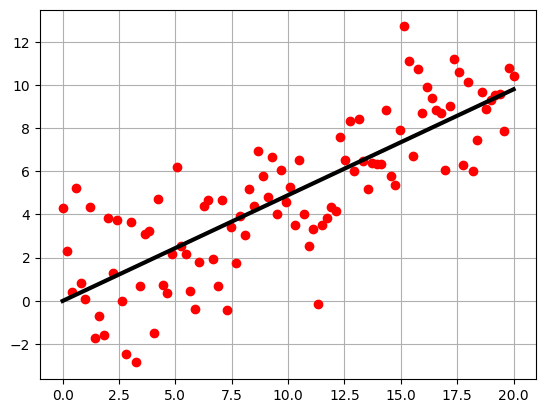

In [10]:
# Plot the data as a scatter-plot with the resulting line on it

plt.figure()
plt.plot(x_train, y_train, 'ro') # --> scatter-plot
plt.plot(x_train, (alpha*x_train+beta), 'k', linewidth=3) # --> line plot
plt.grid()
plt.show()

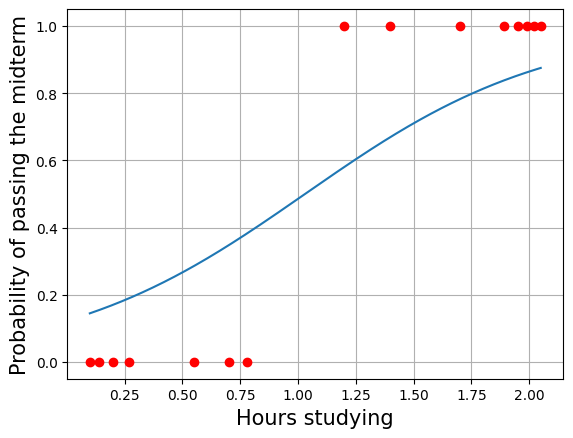

In [11]:
# Obtain the data for logistic regression

x_train = np.load('data/x_train_logistic.npy')
y_train = np.load('data/y_train_logistic.npy').ravel() # ravel() is for having a flat, 1D set

# Create model object and train it with the fit() method

log_reg = LogisticRegression()
p = log_reg.fit(x_train, y_train)

# In the case of linear regression, it was easy the trivial to plot a line, while plotting.
#  For logistic regression let us define this curve prior to plotting

def model(x):
    return (1 / (1 + np.exp(-x)))

# Define the data points for the estimated curve so we can plot them as a continuous curve

x = np.linspace(0.1, 2.05, 300) # --> x-coordinates of the curve
est = model(x*p.coef_+p.intercept_).ravel() # --> y-coordinates for the curve (OBSERVE that the same convention is used by the algorithm to obtain parameters of the log curve as for linreg)

# Plot the data as a scatter-plot with the resulting curve on it

plt.figure()
plt.plot(x_train, y_train, 'ro') # --> scatter-plot
plt.plot(x, est) # --> curve plot
plt.xlabel('Hours studying', fontsize=15)
plt.ylabel('Probability of passing the midterm', fontsize=15)
plt.grid()
plt.show()

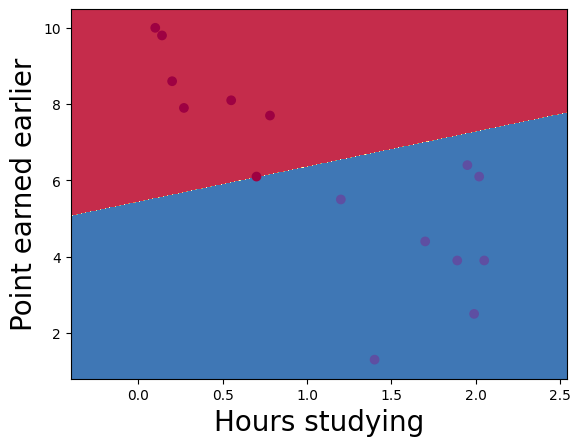

In [12]:
# Please interpret this code by yourself (suggested for those, who would like to learn different visualization techniques)
# This does not add anything new to the given material, just a nice way to visualize decision boundary for logistic regression

x_train = np.load('data/x_train_log_02.npy')
y_train = np.load('data/y_train_log_02.npy')

def plot_decision_boundary(pred_func):
    
    x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
    y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
    
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.ravel(), cmap=plt.cm.Spectral)

log_reg = LogisticRegression()
p = log_reg.fit(x_train, y_train.ravel())


plot_decision_boundary(lambda x: p.predict(x))

plt.xlabel('Hours studying', fontsize=20)
plt.ylabel('Point earned earlier', fontsize=20)
plt.show()